# 케라스 모델 만드는 방법

## Sequential 모델

### 7-1

In [1]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])

### 7-2

In [2]:
model = keras.Sequential()
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

In [ ]:
# 여기서 summary()를 해봤는데 에러가 난다. build 메서드를 호출 하기 전에는 summary 메서드 호출이 불가

### 7-4

In [3]:
model.build(input_shape=(None, 3))
model.weights

[<tf.Variable 'dense_2/kernel:0' shape=(3, 64) dtype=float32, numpy=
 array([[-1.68659121e-01, -2.62618035e-01, -3.80187035e-02,
         -1.00591749e-01, -9.12773311e-02,  1.07885599e-01,
          2.25728273e-01,  2.33989656e-01,  2.16289520e-01,
         -2.02521324e-01,  7.38521516e-02,  3.69947851e-02,
         -1.78001285e-01, -2.85656691e-01,  1.50426626e-01,
          1.92107648e-01, -2.78663516e-01, -2.35535353e-01,
          2.87260950e-01, -2.70334780e-02, -7.12394863e-02,
          8.79868567e-02,  1.70439482e-04, -1.34636670e-01,
         -1.84608832e-01,  7.22190142e-02,  6.01913929e-02,
         -7.52626210e-02, -8.98910612e-02, -2.50555992e-01,
          1.29148632e-01,  3.44344676e-02, -1.02616504e-01,
          2.08188593e-01,  2.53718495e-01, -1.21733263e-01,
          1.30847126e-01,  1.51616573e-01,  2.49947309e-01,
         -6.12378567e-02,  1.98332369e-02,  1.00436509e-02,
         -2.41808921e-01,  2.05249727e-01,  1.77079469e-01,
         -1.48009032e-01, -4.46

### 7-5

In [4]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64)                256       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


### 7-6

In [5]:
model = keras.Sequential(name="내 모델")
model.add(layers.Dense(64, activation="relu", name="1floor"))
model.add(layers.Dense(10, activation="softmax", name="2floor"))
model.build((None, 3))
model.summary()

Model: "내 모델"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
1floor (Dense)               (None, 64)                256       
_________________________________________________________________
2floor (Dense)               (None, 10)                650       
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [8]:
# 모델 명에는 한글이 들어가도 되는데, add 메서드 안의 layer name으로는 한글이 못들어가는 듯 하다.

### 7-7 

In [9]:
model = keras.Sequential()
model.add(keras.Input(shape=(3,)))
model.add(layers.Dense(64, activation="relu"))

In [10]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                256       
Total params: 256
Trainable params: 256
Non-trainable params: 0
_________________________________________________________________


In [11]:
# input layer를 사용하면 summary를 바로 활용할 수 있다.

In [12]:
model.add(layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                256       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


## 함수형 API

### 7-8

In [13]:
inputs = keras.Input(shape=(3,), name="my_input")
features = layers.Dense(64, activation="relu")(inputs)
outputs = layers.Dense(10, activation="softmax")(features)
model = keras.Model(inputs=inputs, outputs=outputs)

In [14]:
outputs.shape

TensorShape([None, 10])

In [15]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
my_input (InputLayer)        [(None, 3)]               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                256       
_________________________________________________________________
dense_7 (Dense)              (None, 10)                650       
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


### 7-9

In [16]:
vocab = 10000
num_tags = 100
num_departm = 4 

title = keras.Input(shape=(vocab,), name="title")
text_body = keras.Input(shape=(vocab,), name="text_body")
tags = keras.Input(shape=(num_tags,), name="tags")

features = layers.Concatenate()([title, text_body, tags])
features = layers.Dense(64, activation="relu")(features)

priority = layers.Dense(1, activation="sigmoid", name="priority")(features)
department = layers.Dense(
    num_departm, activation="softmax", name="department")(features)

model = keras.Model(inputs=[title, text_body, tags], outputs=[priority, department])



### 7-10

In [18]:
import numpy as np

num_samples = 1280

title_data = np.random.randint(0, 2, size=(num_samples, vocab))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocab))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

priority_data = np.random.random(size=(num_samples, 1))
department_data = np.random.randint(0, 2, size=(num_samples, num_departm))

model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"], ["accuracy"]])
model.fit([title_data, text_body_data, tags_data],
          [priority_data, department_data],
          epochs=1)
model.evaluate([title_data, text_body_data, tags_data],
               [priority_data, department_data])
priority_preds, department_preds = model.predict([title_data, text_body_data, tags_data])

40/40 [==============================] - 1s 8ms/step - loss: 25.8758 - priority_loss: 0.3315 - department_loss: 25.5443 - priority_mean_absolute_error: 0.5007 - department_accuracy: 0.1258


In [19]:
model.compile(optimizer="rmsprop",
              loss={"priority": "mean_squared_error", "department": "categorical_crossentropy"},
              metrics={"priority": ["mean_absolute_error"], "department": ["accuracy"]})
model.fit({"text_body": text_body_data, "title": title_data, "tags": tags_data},
          {"priority": priority_data, "department": department_data},
          epochs=1)
model.evaluate({"title": title_data, "tags": tags_data, "text_body": text_body_data},
               {"priority": priority_data, "department": department_data})
priority_preds, department_preds = model.predict(
    {"text_body": text_body_data, "title": title_data, "tags": tags_data})

40/40 [==============================] - 0s 7ms/step - loss: 43.3138 - priority_loss: 0.3315 - department_loss: 42.9823 - priority_mean_absolute_error: 0.5007 - department_accuracy: 0.0609


In [20]:
# 입출력이 굉장히 많은 경우, 순서를 하나하나 지켜가면서 추가하기 어려우니까 쓰는 방법

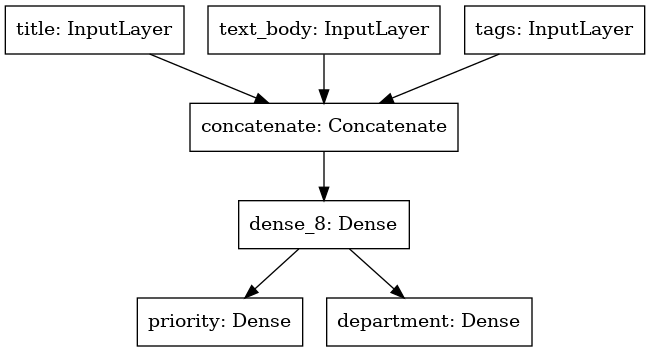

In [21]:
keras.utils.plot_model(model, "ticket_classifier.png")

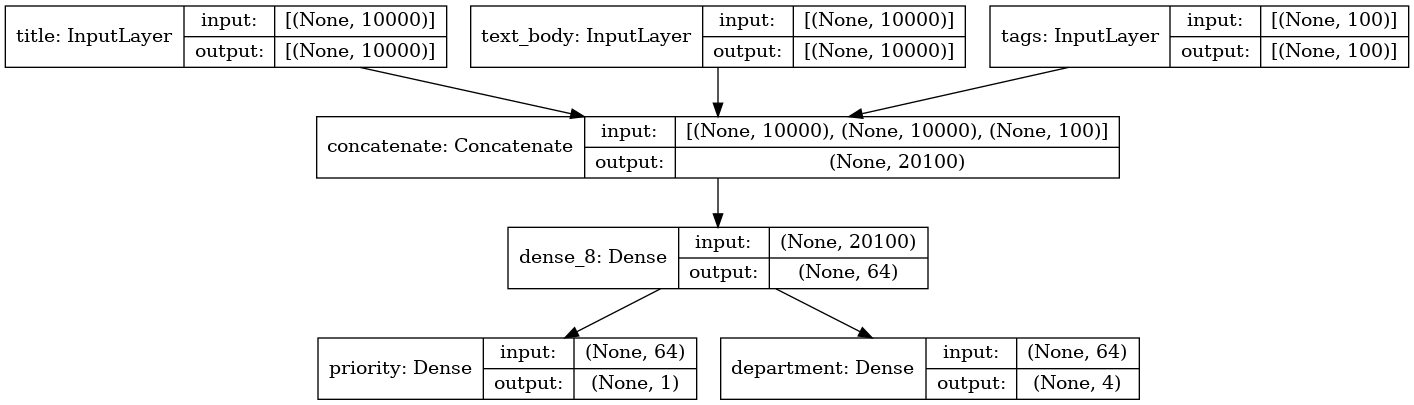

In [22]:
keras.utils.plot_model(model, "ticket_classifier_with_shape_info.png", show_shapes=True)

In [23]:
model.layers

In [24]:
model.layers[0].input

<KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'title')>

In [25]:
model.layers[4].output

<KerasTensor: shape=(None, 64) dtype=float32 (created by layer 'dense_8')>

### 7-13

In [27]:
features = model.layers[4].output
difficulty = layers.Dense(3, activation="softmax", name="difficulty")(features)

new_model = keras.Model(
    inputs=[title, text_body, tags],
    outputs=[priority, department, difficulty])

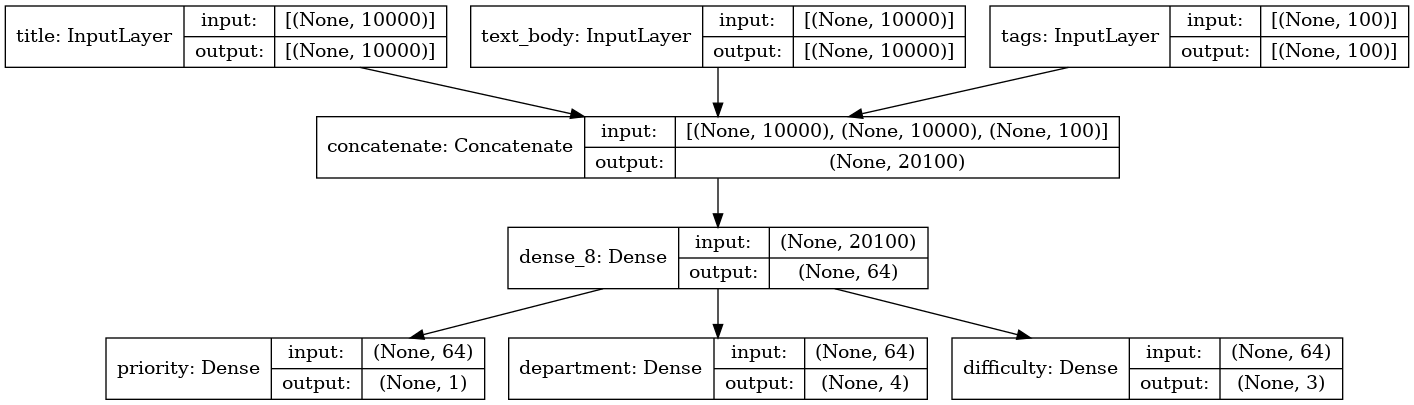

In [29]:
keras.utils.plot_model(new_model, "ticket_classifier_with_shape_info.png", show_shapes=True)

### 7-14

In [30]:
class CustomerTicketModel(keras.Model):   # keras.Model 클래스를 상속받음. keras.Model이 갖는 모든 속성과 메서드를 사용할 수 있게 된다.

    def __init__(self, num_departments):
        super().__init__()    # 상속받은 클래시의 init 초기화 method를 수행한다.
        self.concat_layer = layers.Concatenate()
        self.mixing_layer = layers.Dense(64, activation="relu")
        self.priority_scorer = layers.Dense(1, activation="sigmoid")
        self.department_classifier = layers.Dense(
            num_departments, activation="softmax")

    def call(self, inputs):
        title = inputs["title"]
        text_body = inputs["text_body"]
        tags = inputs["tags"]

        features = self.concat_layer([title, text_body, tags])
        features = self.mixing_layer(features)
        priority = self.priority_scorer(features)
        department = self.department_classifier(features)
        return priority, department  # forward passing
    
model = CustomerTicketModel(num_departments=4)

priority, department = model(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data})


model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"], ["accuracy"]])
model.fit({"title": title_data,
           "text_body": text_body_data,
           "tags": tags_data},
          [priority_data, department_data],
          epochs=1)
model.evaluate({"title": title_data,
                "text_body": text_body_data,
                "tags": tags_data},
               [priority_data, department_data])
priority_preds, department_preds = model.predict({"title": title_data,
                                                  "text_body": text_body_data,
                                                  "tags": tags_data})

40/40 [==============================] - 0s 7ms/step - loss: 17.0786 - output_1_loss: 0.3315 - output_2_loss: 16.7471 - output_1_mean_absolute_error: 0.5007 - output_2_accuracy: 0.1273


### 7-15

In [31]:
class Classifier(keras.Model):

    def __init__(self, num_classes=2):
        super().__init__()
        if num_classes == 2:
            num_units = 1
            activation = "sigmoid"
        else:
            num_units = num_classes
            activation = "softmax"
        self.dense = layers.Dense(num_units, activation=activation)   # 이진 분류와 다중 분류 구분

    def call(self, inputs):
        return self.dense(inputs)

inputs = keras.Input(shape=(3,))
features = layers.Dense(64, activation="relu")(inputs)
outputs = Classifier(num_classes=10)(features)   
model = keras.Model(inputs=inputs, outputs=outputs)

In [32]:
inputs = keras.Input(shape=(64,))
outputs = layers.Dense(1, activation="sigmoid")(inputs)
binary_classifier = keras.Model(inputs=inputs, outputs=outputs)

class MyModel(keras.Model):

    def __init__(self, num_classes=2):
        super().__init__()
        self.dense = layers.Dense(64, activation="relu")
        self.classifier = binary_classifier

    def call(self, inputs):
        features = self.dense(inputs)
        return self.classifier(features)

model = MyModel()

### 7-17

In [33]:
from tensorflow.keras.datasets import mnist

def get_mnist_model():
    inputs = keras.Input(shape=(28 * 28,))
    features = layers.Dense(512, activation="relu")(inputs)
    features = layers.Dropout(0.5)(features)
    outputs = layers.Dense(10, activation="softmax")(features)
    model = keras.Model(inputs, outputs)
    return model

(images, labels), (test_images, test_labels) = mnist.load_data()
images = images.reshape((60000, 28 * 28)).astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28)).astype("float32") / 255
train_images, val_images = images[10000:], images[:10000]
train_labels, val_labels = labels[10000:], labels[:10000]

model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=3,
          validation_data=(val_images, val_labels))
test_metrics = model.evaluate(test_images, test_labels)
predictions = model.predict(test_images)

11501568/11490434 [==============================] - 0s 0us/step
Epoch 1/3
1563/1563 [==============================] - 10s 6ms/step - loss: 0.2951 - accuracy: 0.9123 - val_loss: 0.1593 - val_accuracy: 0.9544
Epoch 2/3
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1666 - accuracy: 0.9539 - val_loss: 0.1276 - val_accuracy: 0.9652
Epoch 3/3
313/313 [==============================] - 1s 2ms/step - loss: 0.1066 - accuracy: 0.9727


### 7-18

In [34]:
import tensorflow as tf

class RootMeanSquaredError(keras.metrics.Metric):

    def __init__(self, name="rmse", **kwargs):
        super().__init__(name=name, **kwargs)
        self.mse_sum = self.add_weight(name="mse_sum", initializer="zeros")
        self.total_samples = self.add_weight(
            name="total_samples", initializer="zeros", dtype="int32")

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.one_hot(y_true, depth=tf.shape(y_pred)[1])
        mse = tf.reduce_sum(tf.square(y_true - y_pred))
        self.mse_sum.assign_add(mse)
        num_samples = tf.shape(y_pred)[0]
        self.total_samples.assign_add(num_samples)

    def result(self):
        return tf.sqrt(self.mse_sum / tf.cast(self.total_samples, tf.float32))

    def reset_state(self):
        self.mse_sum.assign(0.)
        self.total_samples.assign(0)

In [35]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy", RootMeanSquaredError()])
model.fit(train_images, train_labels,
          epochs=3,
          validation_data=(val_images, val_labels))
test_metrics = model.evaluate(test_images, test_labels)

Epoch 1/3
1563/1563 [==============================] - 10s 6ms/step - loss: 0.2928 - accuracy: 0.9143 - rmse: 7.1851 - val_loss: 0.1716 - val_accuracy: 0.9536 - val_rmse: 7.3413
Epoch 2/3
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1667 - accuracy: 0.9523 - rmse: 7.3522 - val_loss: 0.1173 - val_accuracy: 0.9677 - val_rmse: 7.4053
Epoch 3/3
313/313 [==============================] - 1s 2ms/step - loss: 0.1053 - accuracy: 0.9717 - rmse: 7.4324
